# Game of Life

## Classical version

Conway's Game of Life is a cellular automaton, a mathematical model that describes the dynamics of complex systems through the evolution of a grid of cells based on a set of well-defined rules. It was first formulated by the British mathematician John Conway in 1970; at its core, the Game of Life operates on a two-dimensional grid, where each cell (which we will refer to using $S_{i,j}$) is in one of two states - alive (1) or dead (0). The evolution of the system is based on discrete time steps, also known as generations, where the state of each cell is determined by its 8 neighbouring cells (called Moore's neighbours).

The rules of the Game of Life are the following:

1. **Underpopulation:**
   - If a live cell ($S_{i,j} = 1$) has fewer than two live neighbours, it dies in the next generation.
   - Mathematical expression: $S_{i,j}^{(t+1)} = 0$ if $S_{i,j}^{(t)} = 1$ and $\sum_{k,l} S_{k,l}^{(t)} < 2$, where $k, l$ are the indices of neighbouring cells.

2. **Survival:**
   - If a live cell has two or three live neighbours, it survives to the next generation.
   - Mathematical expression: $S_{i,j}^{(t+1)} = S_{i,j}^{(t)}$ if $S_{i,j}^{(t)} = 1$ and $2 \leq \sum_{k,l} S_{k,l}^{(t)} \leq 3$.

3. **Overpopulation:**
   - If a live cell has more than three live neighbuors, it dies in the next generation.
   - Mathematical expression: $S_{i,j}^{(t+1)} = 0$ if $S_{i,j}^{(t)} = 1$ and $\sum_{k,l} S_{k,l}^{(t)} > 3$.

4. **Reproduction:**
   - If a dead cell ($S_{i,j} = 0$) has exactly three live neighbours, it becomes alive in the next generation.
   - Mathematical expression: $S_{i,j}^{(t+1)} = 1$ if $S_{i,j}^{(t)} = 0$ and $\sum_{k,l} S_{k,l}^{(t)} = 3$.

Beyond its theoretical elegance, the Game of Life has practical applications in various scientific domains, including computer science, biology, and physics. Cellular automata, inspired by Conway's creation, continue to influence fields such as cryptography, image processing, and the simulation of natural phenomena. This set of rules mimics indeed the evolution of bacteria due to environmental conditions: if the environment is overpopulated or underpopulated the bacteria dies, while it reproduces if the conditions are optimal.

## Code

### Import zone

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.animation as anim

The external libraries we utilized are the following:

1. **NumPy:**
   NumPy is used for efficient array manipulations, numerical operations, and handling the grid structure required for the Game of Life simulation.

2. **Operating System Module:**
   The `os` module is utilized for interacting with the operating system. In particular we use it in constructing file paths and checking the current working directory, which allows us to keep the work environment more clean: we store and access the pattern file that defines the initial state of the Game of Life in another directory (called 'patterns'), while the output images are stored in the directory 'outputs'. 

3. **Matplotlib Pyplot:**
   Matplotlib.pyplot is utilized for creating visual representations of the evolving Game of Life grid.

4. **Matplotlib Animation Module:**
   The `animation` module from Matplotlib is specifically imported to leverage its capabilities in creating dynamic animations: in particular it enables the visualization of the Game of Life's evolution over multiple steps, contributing to a more comprehensive understanding of the cellular automaton's behavior.


### Parameters zone

In [2]:
x_dim=10
y_dim=10
pattern_name="prova"
evo_steps=5
time_per_image=0.5

In this zone we define the most significant parameters of our simulation:

1. **x_dim and y_dim:**
These variables define the dimensions of the grid in the x and y directions, so they determine the size of the simulated space where the Game of Life will evolve: we started with a small dimension and then proceeded to a bigger grid.

2. **pattern_name:**
The `pattern_name` variable holds the name of the file containing the initial pattern, which is expected to be in the 'patterns' folder. This allows us to store here more initial conditions and study the mergent patterns of the GoL.

3. **evo_steps:**
`evo_steps` represents the number of steps or generations the simulation will compute: this is a crucial parameter in order to see the emergent patterns, in particular the most complicated ones that have a long period of evolution. 

4. **time_per_image:**
`time_per_image` sets the time duration for each image in the animation (in seconds).

### Pattern inizialization

In [3]:
def read_file(pattern_name):
    cwd=os.getcwd()
    #print(cwd)
    file_path = os.path.join(cwd, 'patterns', f'{pattern_name}.txt')

    max_height=0
    max_width=0

    with open(file_path, 'r') as file:
        for line in file:
            cleaned_line=line.replace("\n", "")
            len_line=int(len(cleaned_line))
            if(len_line>max_width):
                    max_width=len_line
            max_height+=1

    pattern=np.zeros(shape=(max_height,max_width))

    with open(file_path, 'r') as file:
        for i,line in enumerate(file):
            cleaned_line=line.replace("\n", "")
            for j,char in enumerate(cleaned_line):
                pattern[i,j]=char

    return max_height,max_width,pattern

The `read_file` function is designed to read a text file containing an initial pattern for Conway's Game of Life. 

1. **Current Working Directory and File Path:**
   - `cwd = os.getcwd()`: Retrieves the current working directory.
   - `file_path = os.path.join(cwd, 'patterns', f'{pattern_name}.txt')`: Constructs the absolute file path by joining the current working directory, the 'patterns' folder, and the specified pattern file name (with a '.txt' extension).

2. **Determine Pattern Dimensions:**
   - `max_height=0` and `max_width=0`: Initialize variables to store the maximum height and width of the pattern.
   - Then, a loop reads through each line of the chosen pattern file and calculates the maximum width based on the length of each line. First of all, the line breaks ('\n') are removed to get the cleaned line.
   - `if(int(len(cleaned_line))>max_width)`: Updates `max_width` if the length of the cleaned line is greater than the current maximum width.
   - `max_height+=1`: Increments `max_height` for each line, representing the total number of lines in the initial pattern.

3. **Initialize Pattern Array:**
   - `pattern=np.zeros(shape=(max_height,max_width))`: Creates a NumPy array filled with zeros, representing the grid for the Game of Life with dimensions determined by `max_height` and `max_width`.

4. **Read and Populate Pattern Array:**
   - Two loops read through each line of the pattern file again (as in step 2).
   - The outer loop iterates over lines, and the inner loop iterates over characters in each line.
   - `pattern[i, j] = char`: Populates the `pattern` array with the characters from the pattern file, where '1' represents a live cell and '0' represents a dead cell.

5. **Return Results:**
   - Returns the maximum height, maximum width, and the populated pattern array.

### Board inizialization

In [4]:
def board_init(x_dim, y_dim, pattern_name):
    max_height,max_width,pattern=read_file(pattern_name)

    if(max_height>y_dim or max_width>x_dim):
        raise(ValueError(f"The dimensions of the pattern are too big for the simulated space.\nThe dimensions of the space are:\nX:\t{x_dim}\nY:\t{y_dim}\n\nThe dimensions of the pattern are:\nX:\t{max_width}\nY:\t{max_height}"))

    center_space_x=int(x_dim/2)
    center_space_y=int(y_dim/2)
    center_pattern_x=int(max_width/2)
    center_pattern_y=int(max_height/2)

    board=np.zeros(shape=(x_dim,y_dim))

    start_x = center_space_x - center_pattern_x
    end_x = start_x + max_width
    start_y = center_space_y - center_pattern_y
    end_y = start_y + max_height

    board[start_y:end_y, start_x:end_x] = pattern
    
    return board

The `board_init` function is designed to initialize the board based on specified dimensions and a given pattern read from a file; in particular it ensures that the initial state of the Game of Life is centered within the specified grid dimensions. This choice is due to the fact that the rules change for the limit of the grid (the cells don't have 8 neighbours anymore), so we want to minimize this effect.

1. **Input Parameters:**
   - `x_dim`: The width (number of columns) of the Game of Life board.
   - `y_dim`: The height (number of rows) of the Game of Life board.
   - `pattern_name`: The name of the pattern file to be read and initialized on the board.

2. **Pattern Retrieval:**
   - Calls the `read_file` function (previously explained) to obtain information about the pattern, in particular its maximum height, maximum width, and the pattern itself.

3. **Pattern and Space Dimension Check:**
   - `if(max_height > y_dim or max_width > x_dim):`: Checks if the dimensions of the pattern exceed the dimensions of the simulated space specified in the parameters.
   - `raise(ValueError(f"The dimensions of the pattern...))`: Raises a `ValueError` if the pattern dimensions are too large, providing information about the simulated space dimensions and the pattern dimensions.

4. **Centering Calculation:**
   - Calculates the starting positions (`start_x`, `end_x`, `start_y`, `end_y`) to place the pattern at the center of the Game of Life space.

5. **Board Initialization:**
   - Initializes a Game of Life board with zeros using NumPy.
   - Copies the pattern onto the board at the calculated positions, effectively placing it in the center.

6. **Output:**
   - Returns the initialized Game of Life board.

### Board evolution

In [5]:
def alive_neighbours(board_old,j,k):
    count=0
    for l in range(-1, 2):
        for m in range(-1, 2):
            if l == 0 and m == 0:
                continue
            new_row, new_col = j + l, k + m
            if 0 <= new_row < len(board_old) and 0 <= new_col < len(board_old[0]) and board_old[new_row, new_col] == 1:
                count += 1
    return count

def cell_evolution(board_old,j,k,count):
    if(board_old[j,k]==0 and count==3):                             #dead cell
        evolved_value=1
    elif(board_old[j,k]==1 and (count<2 or count>3)):               #alive cell
        evolved_value=0
    else:
        evolved_value=board_old[j,k]
    
    return evolved_value


def board_evolut(evo_steps, board_in):
    board_evo=[board_in]
    
    for i in range(evo_steps):
        board_old=board_evo[-1]
        board_new=board_old.copy()
        for j in range(len(board_old)):
            for k in range(len(board_old[j])):
                #calculate number of alive and dead neighbours
                count_alive=alive_neighbours(board_old,j,k)
                #calculate evolution of cell (only cases where the value of the cell is changed because board_new is a copy of board_old)
                board_new[j,k]=cell_evolution(board_old,j,k,count_alive)
        board_evo.append(board_new)
    
    return board_evo

This section of the code manages the evolution of the board over the specified number of steps; the evolution is carried out using three functions (`alive_neighbours`, `cell_evolution`, and `board_evolut`), following the rules explained in the introduction.

1. **`alive_neighbours` function:**
   - This function takes the current coordinates `(j, k)` of a cell on the board (`board_old`) and calculates the number of alive neighbours surrounding that cell.
   - It iterates over the neighbouring cells in a 3x3 grid (excluding the central cell) and increments the count if the neighbouring cell is alive.
   - Returns the count of alive neighbors.

2. **`cell_evolution` function:**
   - Given the current state of a cell (`board_old[j, k]`), the count of alive neighbors, and the predefined rules of Conway's Game of Life, this function determines the next state of the cell after one time step.
   - If the cell is currently dead (`board_old[j, k] == 0`) and has exactly three alive neighbors, it becomes alive. If the cell is currently alive (`board_old[j, k] == 1`) and has fewer than two or more than three alive neighbors, it dies. Otherwise, the cell retains its current state.
   - Returns the evolved value of the cell.

3. **`board_evolut` function:**
   - This function simulates the evolution of the Game of Life board over a specified number of time steps (`evo_steps`).
   - It initializes a list (`board_evo`) with the initial board state (`board_in`).
   - For each time step, it creates a new board (`board_new`) based on the rules of the Game of Life by applying the `cell_evolution` function to each cell and appends the new board to the list of evolved boards (`board_evo`).
   - Returns the list of board states representing the evolution of the Game of Life.

### Visualization

In [6]:

def update(step, im, ax, board_evo):    
    im.set_array(board_evo[step])
    ax.set_title(f"Step number {step}")
    return im,  # return the artists to be updated


def board_gif(x_dim, y_dim, time_per_image, evo_steps, board_evo, pattern_name):
    cwd=os.getcwd()
    file_path = os.path.join(cwd, 'outputs/pattern_evolutions', f'{pattern_name}_evolution.gif')

    fps=int(1/time_per_image)
    fig, ax = plt.subplots()
    im = ax.matshow(board_evo[0], cmap=plt.cm.Blues, extent=(0, board_evo[0].shape[1], board_evo[0].shape[0], 0))
    fig.colorbar(im)
    ax.grid()
    ax.set_xticks(np.arange(0, x_dim + 1, 1))
    ax.set_yticks(np.arange(0, y_dim + 1, 1))
    ani = anim.FuncAnimation(fig, update, fargs=(im,ax,board_evo,), frames=evo_steps+1, repeat=False, interval=time_per_image*1000)
    
    ani.save(file_path, writer='pillow',fps=fps)
    plt.close(fig)
    return None


def board_visual(board_evo):
    cwd=os.getcwd()

    for i,element in enumerate(board_evo):
        #print(element)
        #print("##########################")
        fig, ax = plt.subplots()
        cax = ax.matshow(element, cmap=plt.cm.Blues, extent=(0, element.shape[1], element.shape[0], 0))
        #fig.colorbar(cax)
        plt.grid()

        plt.xticks(np.arange(0,x_dim + 1, 1))
        plt.yticks(np.arange(0,y_dim + 1, 1))
        plt.title(f"Step number {i}")

        file_path = os.path.join(cwd, 'outputs/steps', f'Step number {i}.png')
        plt.savefig(file_path)
        plt.show()
    return None

These functions provide different methods for visualizing the evolution of the Game of Life board: a dynamic animation in the form of a GIF (`board_gif`) and a sequence of static images (`board_visual`). The `update` function plays a crucial role in updating the visualization at each step of the animation.

1. **`update` function:**
   - This function is used as an update method for the animation (`FuncAnimation`). It takes the current step, the `Image` object (`im`), the `Axis` object (`ax`), and the list of board states (`board_evo`).
   - It updates the `im` object with the current state of the board at the specified step and sets the title of the plot to indicate the step number.
   - The updated `im` object is returned to be used in the animation.

2. **`board_gif` function:**
   - This function generates a GIF animation of the Game of Life board evolution.
   - It creates a Matplotlib figure and axis (`fig, ax`) and initializes an `Image` object (`im`) with the first board state.
   - It uses `FuncAnimation` to update the board at each step by calling the `update` function.
   - The animation is saved as a GIF file, and the function returns `None`.

3. **`board_visual` function:**
   - This function visualizes the evolution of the Game of Life board by creating a series of static images.
   - It iterates through each board state in `board_evo` and plots the board using `plt.matshow()`.
   - Each plot is saved as an image file, and the function displays the static plots one by one.
   - This function is useful for creating a sequence of images representing the steps of the board evolution.


### Simulation

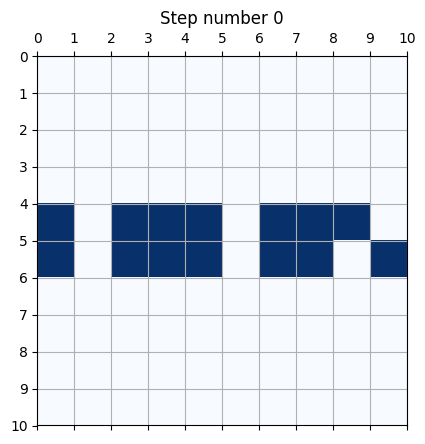

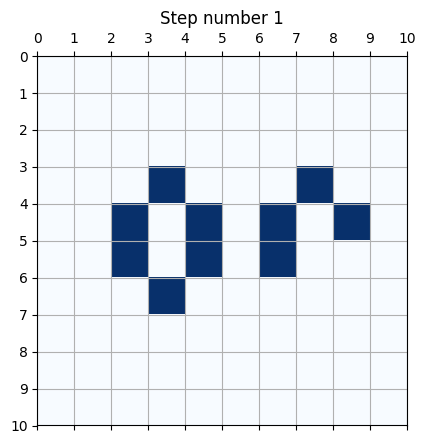

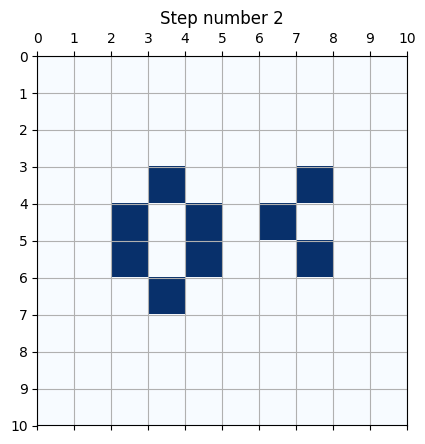

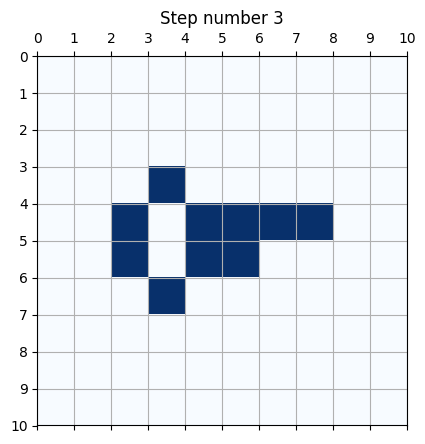

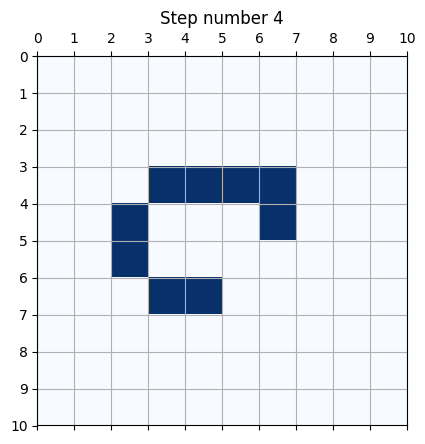

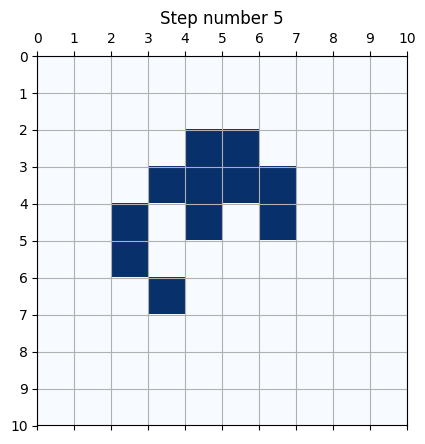

In [7]:
board = board_init(x_dim, y_dim, pattern_name)
board_evo = board_evolut(evo_steps, board)
board_visual(board_evo)
board_gif(x_dim, y_dim, time_per_image, evo_steps, board_evo, pattern_name)

## Classical patterns

Many different types of patterns occur in the Game of Life, which are classified according to their behaviour. Common pattern types include: still lifes, which do not change from one generation to the next; oscillators, which return to their initial state after a finite number of generations; and spaceships, which translate themselves across the grid. We analyzed the most frequently occurring examples (meaning that they emerge frequently from a random starting configuration of cells) of each of those types. More complicated patterns require a bigger board and a lot of steps in order to become periodical.

### Still lifes

A still life is a pattern that does not change from one generation to the next, and thus may be thought of as an oscillator with period 1. The two main subgroups of still lifes are strict still lifes and pseudo still lifes: 
- a strict still life is a still life that is either connected (i.e., has only one island), or is such that removing one or more its islands destroys the stability of the pattern.
- a pseudo still life consists of two or more islands which can be partitioned (either individually or as sets) into non-interacting subpatterns which are by themselves each still lifes.

**Cube**: The cube is the simplest still life pattern, consisting of four cells arranged in a 2x2 square. It remains unchanged in each generation.

In [8]:
board = board_init(x_dim, y_dim, "cube")
board_evo = board_evolut(evo_steps, board)
board_gif(x_dim, y_dim, time_per_image, evo_steps, board_evo, "cube")

![MyGif]( outputs/pattern_evolutions/cube_evolution.gif "segment")

**Mirrored tables**: it is a 12-cell still life. It is a strict still life because neither table is stable without the other.

In [9]:
board = board_init(x_dim, y_dim, "mirrored_tables")
board_evo = board_evolut(evo_steps, board)
board_gif(x_dim, y_dim, time_per_image, evo_steps, board_evo, "mirrored_tables")

![MyGif]( outputs/pattern_evolutions/mirrored_tables_evolution.gif "segment")

**Cis-mirrored elf shoe**: The cis-mirrored elf-shoe is a strict still life composed of 34 cells, comprising two elf-shoes that mutually stabilize each other. It represents one of five possible arrangements where two elf-shoes combine to form a still life. This particular isomer, termed cis-mirrored, derives its name from the absence of skewness between the two adjacent faces (thus "mirrored") and the alignment of the denser components on the same side (thus "cis"). Consequently, among the five arrangements, it stands as the sole configuration exhibiting mirror symmetry.

In [10]:
board = board_init(x_dim, y_dim, "cis_mirrored_elf_shoe")
board_evo = board_evolut(evo_steps, board)
board_gif(x_dim, y_dim, time_per_image, evo_steps, board_evo, "cis_mirrored_elf_shoe")

![MyGif]( outputs/pattern_evolutions/cis_mirrored_elf_shoe_evolution.gif "segment")

**Bi-block**: The bi-block is a common formation of two blocks and the smallest and most common pseudo still life. It is a pseudo still life because each block is stable by itself.

In [11]:
board = board_init(x_dim, y_dim, "bi_block")
board_evo = board_evolut(evo_steps, board)
board_gif(x_dim, y_dim, time_per_image, evo_steps, board_evo, "bi_block")

![MyGif]( outputs/pattern_evolutions/bi_block_evolution.gif "segment")

### Oscillators

An oscillator is a pattern that repeats itself after a fixed number of generations (known as its period).  An oscillator is divided into a rotor (the individual cells that actually oscillate) and a stator (the cells which remain alive throughout its whole period).

**Blinker**: The blinker is the smallest and most common oscillator, found by John Conway in 1969. It is the only known finite oscillator that is one cell thick.

In [12]:
board = board_init(x_dim, y_dim, "blinker")
board_evo = board_evolut(evo_steps, board)
board_gif(x_dim, y_dim, time_per_image, evo_steps, board_evo, "blinker")

![MyGif]( outputs/pattern_evolutions/blinker_evolution.gif "segment")

**Caterer**: Caterer is the smallest period-3 oscillator.

In [13]:
board = board_init(x_dim, y_dim, "caterer")
board_evo = board_evolut(evo_steps, board)
board_gif(x_dim, y_dim, time_per_image, evo_steps, board_evo, "caterer")

![MyGif]( outputs/pattern_evolutions/caterer_evolution.gif "segment")

### Spaceships

A spaceship is a finite pattern that returns to its initial state after a number of generations (known as its period) but in a different location. The speed of a spaceship is the number of cells that the pattern moves during its period, divided by the period length. This is expressed in terms of c (the metaphorical "speed of light") which is one cell per generation.

**Glider**:The glider is the smallest, most common, and first-discovered spaceship in Game of Life. It travels diagonally across the grid at a speed of c/4.

In [14]:
board = board_init(x_dim, y_dim, "glider")
board_evo = board_evolut(evo_steps, board)
board_gif(x_dim, y_dim, time_per_image, evo_steps, board_evo, "glider")

![MyGif]( outputs/pattern_evolutions/glider_evolution.gif "segment")

**Lightweight spaceship**: the lightweight spaceship (commonly abbreviated to LWSS) or (rarely) small fish[1] is the smallest orthogonal spaceship, and the second most common spaceship after the glider. It moves at speed c/2 and has period 4

In [15]:
board = board_init(x_dim, y_dim, "lightweight")
board_evo = board_evolut(evo_steps, board)
board_gif(x_dim, y_dim, time_per_image, evo_steps, board_evo, "lightweight")

![MyGif]( outputs/pattern_evolutions/lightweight_evolution.gif "segment")

## Semi-quantum version

A semi-quantum version can be obtained considering deterministic dynamics applied to quantum states; we based our analysis on the following article: https://arxiv.org/abs/1902.07835 .

In order to construct this model we need to modify Conway's Game of Life in order for each cell to be considered a quantum state ($\ket{\psi}$); in particular, each cell can be tought as a qubit, the quantum unit of information: this means that each cell can either be alive ($\ket{\psi}=\ket{1}$), dead ($\ket{\psi}=\ket{0}$) or in a superposition of the two states. 

$\ket{\psi} = a\ket{1} + b \ket{0} = a \begin{pmatrix} 1 \\ 0 \end{pmatrix} + b \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} a \\ b \end{pmatrix}$. 

This means that we can have semi-life cells and their 'liveness' is described by the coefficient $a$, while their 'deadness' by the coefficient $b$. Here $a$ and $b$ are positive real constants and each of these states is normalised, so we will always have $a + b = 1$.

The evolutionary rules are different from the classical version and are based on the operators of birth ($\hat{B}$), death ($\hat{D}$), and survival ($\hat{S}$). The application of each operators also includes a normalisation step so that: $\quad \hat{B} \ket{\psi} = \ket{1} \quad \hat{D} \ket{\psi} = \ket{0} \quad \hat{S} \ket{\psi} = \ket{\psi}$.

The matricial form of the operator is: $\quad \hat{B} = \begin{pmatrix} 1 & 1 \\ 0 & 0 \end{pmatrix} \quad \hat{D} = \begin{pmatrix} 0 & 0 \\ 1 & 1 \end{pmatrix} \quad \hat{S} = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$


As in the classical version the rules depend on the state of the 8 neighbours of each cell; in the semi-quantum version this depenendcy is on the total liveness, $A$, of the Moore neighbourhood defined as $A = \sum_{k=1}^8 a_k$ where $a_k$ is the liveness of the $k^{th}$ cell in the Moore neighbourhood. The semi-quantum rules reproduce the classical rules if $A$ is an integer value.

The next generation is obtained using the operation $\begin{pmatrix} a' \\ b' \end{pmatrix} = \hat{G} \begin{pmatrix} a \\ b \end{pmatrix}$, where the operator $\hat{G}$ changes according to the value of $A$. These rules describe a completely deterministic dynamics and not quantum, so we are studying the behaviour of our quantum board in a classical regime, as we can see in the following table:

|        **A**        |          $\hat{G}$           |
|:---------------:|:---------------------------:|
| $0 \leq A \leq 1$ |           $\hat{D}$           |
| $1 < A \leq 2$   | $(\sqrt{2} + 1)(2-A)\hat{D} + (A-1)\hat{S}$ |
| $2 < A \leq 3$   | $(\sqrt{2} + 1)(3-A)\hat{S} + (A-2)\hat{B}$ |
| $3 < A \leq 4$   | $(\sqrt{2} + 1)(4-A)\hat{B} + (A-3)\hat{D}$ |
|     $A \geq 4$     |           $\hat{D}$           |

In order to implement the semi-quantum version we had to modify the classical code, in particular the functions that handle the initialization and the evolution of the board. Thus, we added a new paramater, `game_type`, which tells us which version of the game we are considering.

### Parameters zone

In [16]:
x_dim=20
y_dim=20          
pattern_name="provaquantum"
evo_steps=40
time_per_image=0.5
game_type="quantum"

### Pattern inizialization

In [17]:
def read_file(pattern_name,game_type):
    cwd=os.getcwd()
    file_path = os.path.join(cwd, 'patterns', f'{pattern_name}.txt')

    max_height=0
    max_width=0

    with open(file_path, 'r') as file:
        for line in file:
            cleaned_line=line.replace("\n", "")
            if(game_type=="classical"):
                len_line=int(len(cleaned_line))
            elif(game_type=="quantum"):
                len_line=len([float(digit) for digit in cleaned_line.split(sep= " ")])
            if(len_line>max_width):
                    max_width=len_line
            max_height+=1

    pattern=np.zeros(shape=(max_height,max_width))

    with open(file_path, 'r') as file:
        for i,line in enumerate(file):
            cleaned_line=line.replace("\n", "")
            if(game_type=="quantum"):
                cleaned_line=[float(digit) for digit in cleaned_line.split(sep= " ")]
            for j,char in enumerate(cleaned_line):
                pattern[i,j]=char

    return max_height,max_width,pattern

The adjustment we made regards the reading from file: in particular for the quantum version we want to initialize and visualize on the board the liveness of each cell (parameter $a$), so we must use floating point and not binary frank digits. In particular:

1. **Pattern Dimensions Calculation:**
   - For the "quantum" game type, it counts the number of float values obtained by splitting each line using space as a separator.

2. **Pattern Population:**
   - For the "quantum" game type, it converts the space-separated string of numbers into a list of floats.

### Board inizialization

In [18]:
def board_init(x_dim, y_dim, pattern_name, game_type):
    max_height,max_width,pattern=read_file(pattern_name, game_type)

    if(max_height>y_dim or max_width>x_dim):
        raise(ValueError(f"The dimensions of the pattern are too big for the simulated space.\nThe dimensions of the space are:\nX:\t{x_dim}\nY:\t{y_dim}\n\nThe dimensions of the pattern are:\nX:\t{max_width}\nY:\t{max_height}"))

    center_space_x=int(x_dim/2)
    center_space_y=int(y_dim/2)
    center_pattern_x=int(max_width/2)
    center_pattern_y=int(max_height/2)

    board=np.zeros(shape=(x_dim,y_dim))

    start_x = center_space_x - center_pattern_x
    end_x = start_x + max_width
    start_y = center_space_y - center_pattern_y
    end_y = start_y + max_height

    board[start_y:end_y, start_x:end_x] = pattern
    
    return board

The function `board_init` remains unchanged, except for the call to the `read_file` function, which now has the `game_type` parameter.

### Board evolution

In [19]:
def alive_neighbours(board_old,j,k,game_type):
    count=0
    for l in range(-1, 2):
        for m in range(-1, 2):
            if l == 0 and m == 0:
                continue
            new_row, new_col = j + l, k + m
            if(game_type=="classical"):
                if 0 <= new_row < len(board_old) and 0 <= new_col < len(board_old[0]) and board_old[new_row, new_col] == 1:
                    count += 1
            if(game_type=="quantum"):
                if 0 <= new_row < len(board_old) and 0 <= new_col < len(board_old[0]):
                    count += board_old[new_row,new_col]
    return count

def cell_evolution(board_old,j,k,count,game_type):
    if(game_type=="classical"):
        if(board_old[j,k]==0 and count==3):                             #dead cell
            evolved_value=1
        elif(board_old[j,k]==1 and (count<2 or count>3)):               #alive cell
            evolved_value=0
        else:
            evolved_value=board_old[j,k]
    elif (game_type=="quantum"):
        B=np.array([[1.,1.],[0.,0.]])
        D=np.array([[0.,0.],[1.,1.]])
        S=np.array([[1.,0.],[0.,1.]])
        G=np.zeros_like(B)
        if(count>=0 and count<=1):
            G=D
        elif(count>1 and count<=2):
            G=(np.sqrt(2)+1)*(2-count)*D + (count-1)*S
        elif(count>2 and count<=3):
            G=(np.sqrt(2)+1)*(3-count)*S + (count-2)*B
        elif(count>3 and count<=4):
            G=(np.sqrt(2)+1)*(4-count)*B + (count-3)*D
        elif(count>4):
            G=D
        evolved_value=np.dot(G,np.array([board_old[j,k],1-board_old[j,k]]))
        if np.sum(evolved_value) != 0:
            evolved_value /= np.sum(evolved_value)
    return evolved_value[0]

def board_evolut(evo_steps, board_in, game_type):
    board_evo=[board_in]

    for i in range(evo_steps):
        board_old=board_evo[-1]
        board_new=board_old.copy()
        for j in range(len(board_old)):
            for k in range(len(board_old[j])):
                count_alive=alive_neighbours(board_old,j,k,game_type)
                board_new[j,k]=cell_evolution(board_old,j,k,count_alive, game_type)
        board_evo.append(board_new)
    
    return board_evo

In the evolution we included the new paramater and the rules defined before for the semi-quantum model.

1. **`alive_neighbours`:**
   - For the 'quantum' game type, it iterates over neighbouring cells and sums all their liveness values, in order to compute the value of $A$.

2. **`cell_evolution`:**
   - For the "quantum" game type, it uses the aforementioned quantum-inspired rules represented by matrices (`B`, `D`, `S`, `G`), which depend on the value of $A$.

3. **`board_evolut`:**
   - This function stays the same, with the only difference of including as new parameter the specified `game_type`.

### Visualization

The functions that handle the visualization are the same as before; in the quantum-version the colorbar is useful to describe the differrent values of the parameters $a$ of each cell.

### Simulation

In [20]:
board = board_init(x_dim, y_dim, "provaquantum", game_type)
board_evo = board_evolut(evo_steps, board, game_type)
# board_visual(board_evo)
board_gif(x_dim, y_dim, time_per_image, evo_steps, board_evo, "provaquantum")

![MyGif]( outputs/pattern_evolutions/provaquantum_evolution.gif "segment")

## Semi-quantum patterns

Also in the semi-quantum simulation we can find some emerging patterns, even though the evolution is much more complicated due to the infinite values a single cell can have. We tried to study some patterns.

As expected, all classical patterns are perfectly reproduced in the quantum version of the game (the rules are built exactly in this way). 

### Still lives

For the quantum case, as often happens, we see a flourish of cases of still lifes; we report some of them that can be easily found.

**Qudot**: the central cell is fixed to 1, while the four cross-adjacent cells are fixed to 0.5.

In [21]:
board = board_init(x_dim, y_dim, "qudot", game_type)
board_evo = board_evolut(evo_steps, board, game_type)
# board_visual(board_evo)
board_gif(x_dim, y_dim, time_per_image, evo_steps, board_evo, "qudot")

![MyGif]( outputs/pattern_evolutions/qudot_evolution.gif "segment")

**Qutub**: we fix 4 cells to 1 (cross-like, with the center fixed to 0) and the 4 angle-cells have random value (less then one), with the additional condition that their two-by-two sum is less than one.

In [22]:
board = board_init(x_dim, y_dim, "qutub", game_type)
board_evo = board_evolut(evo_steps, board, game_type)
# board_visual(board_evo)
board_gif(x_dim, y_dim, time_per_image, evo_steps, board_evo, "qutub")

![MyGif]( outputs/pattern_evolutions/qutub_evolution.gif "segment")

**Qunoe**: more complicated example.

In [23]:
board = board_init(x_dim, y_dim, "qunoe", game_type)
board_evo = board_evolut(evo_steps, board, game_type)
board_gif(x_dim, y_dim, time_per_image, evo_steps, board_evo, "qunoe")

![MyGif]( outputs/pattern_evolutions/qunoe_evolution.gif "segment")

### Other patterns and clouds

In the semi-quantum version it's difficult to find moving patterns similar to the classical ones (like oscillators and gliders) due to the flourish of possible values that a single cell can have; for the same reason we couldn't find small repeating pattern that can give birth to moving pattern in the semi-quantum version. Nevertheless, we noticed that for some initial configuration the evolution of the board resambles the one of a 'quantum cloud' that expands from a starting center; in most of the cases we analyse we arrive to the two possible stable conclusion, a stable form or a completly dead board. In the following we present some examples of these behaviours.

In [24]:
board = board_init(x_dim, y_dim, "quloud", game_type)
board_evo = board_evolut(evo_steps, board, game_type)
board_gif(x_dim, y_dim, time_per_image, evo_steps, board_evo, "quloud")

![MyGif]( outputs/pattern_evolutions/quloud_evolution.gif "segment" )

In [25]:
board = board_init(x_dim, y_dim, "quloud2", game_type)
board_evo = board_evolut(evo_steps + 40, board, game_type)
board_gif(x_dim, y_dim, time_per_image, evo_steps + 40, board_evo, "quloud2")

![MyGif]( outputs/pattern_evolutions/quloud2_evolution.gif "segment" )

### Stable dynamics

Finally we studied whether a stable dynamics can emerge from a randomly initialized board: our goal was to understand if the semi-quantum game of life dynamics depends on which cells are initialized and how or if in any case a stable dynamical situation is reached. In order to do this we have to consider a much bigger grid and a longer time, so we increased these paramaters and then we studied the mean liveness on each generation. 

In particular, a fraction $f$ of random cells in the grid is initialized with a liveness $a$ chosen via a random number uniformly distributed between 0 and 1.

In [26]:
x_dim = 100
y_dim = 100
evo_steps = 350

In [27]:
def matrix_generator(x_dim, y_dim, f):
    matrix = np.zeros((x_dim, y_dim))
    nonzero_values_count = int(x_dim * y_dim * f)
    nonzero_indexes = np.random.choice(range(x_dim * y_dim), nonzero_values_count)
    
    for index in nonzero_indexes:
        row = index // y_dim
        column = index % y_dim
        matrix[row][column] = np.random.uniform(0, 1)
    
    return matrix

def save_matrix(matrix, file_name):
    with open(file_name, 'w') as file:
        for row in matrix:
            formatted_row = ' '.join(map(str, row))
            file.write(formatted_row + '\n')

These functions are used to generate a sparse matrix with random non-zero values and save it to a text file which is consistent to the required text file for the previous defined functions that handle the board evolution.

1. **`matrix_generation`:**
   - This function generates a matrix of dimensions `x_dim` by `y_dim` and the parameter `f` determines the fraction of non-zero values in the matrix.
   - It initializes a matrix with all elements set to zero and then randomly assigns non-zero values to a certain percentage of elements based on `f`.
   - The generated matrix is returned.

2. **`save_matrix`:**
   - This function takes a matrix and a file name as input.
   - It saves the matrix to a file with the specified name.
   - Each row of the matrix is written to the file, with elements separated by spaces.

In [28]:
def mean_board(board_evo):
    averages = []
    for board in range(len(board_evo)):
        average = np.mean(board_evo[board])
        averages.append(average)
    return averages

def avg_liveness_plot(board_evo, file_name):
    average_liveness = mean_board(board_evo)
    fig = plt.plot(np.arange(0, len(board_evo), 1), average_liveness)
    plt.savefig(f"{file_name}.png")
    plt.show()
    return None

These functions help analyze and visualize the average liveness of game boards over time, providing a plot that illustrates how the average liveness changes throughout the evolution of the boards

1. **`mean_board`:**
   - This function takes a list `board_evo` as input, where each element is a representation of a game board at a particular point in time.
   - It calculates the mean value for each board in the evolution and stores the results in a list called `averages`.
   - The list of average values is then returned.

2. **`avg_liveness_plot`:**
   - This function takes a list `board_evo` as input, representing the evolution of game boards over time.
   - It calls the `mean_board` function to calculate the average values for each board in the evolution.
   - It then creates a plot using `matplotlib.pyplot`, where the x-axis represents the time steps (board indices), and the y-axis represents the average values of liveness.
   - The plot is saved as "`file_name.png`" and displayed using `plt.show()`.

We computed mean liveness $<a>$ over the whole board in two cases, for $f=0.2$ and for $f=0.8$

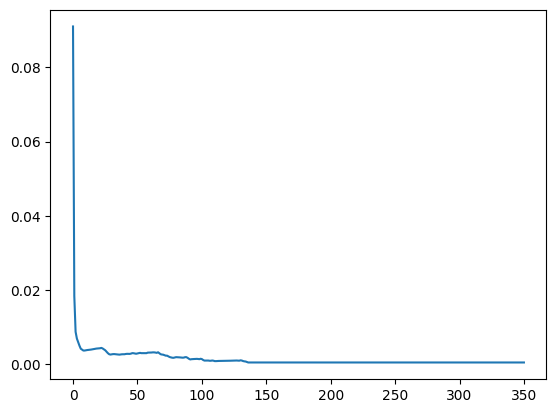

In [30]:
matrix_two = matrix_generator(x_dim, y_dim, 0.2)
save_matrix(matrix_two, "patterns/f20.txt")

board = board_init(x_dim, y_dim, "f20", game_type)
board_evo = board_evolut(evo_steps, board, game_type)
board_gif(x_dim, y_dim, time_per_image, evo_steps, board_evo, "f20")

avg_liveness_plot(board_evo, 'f20_graph')

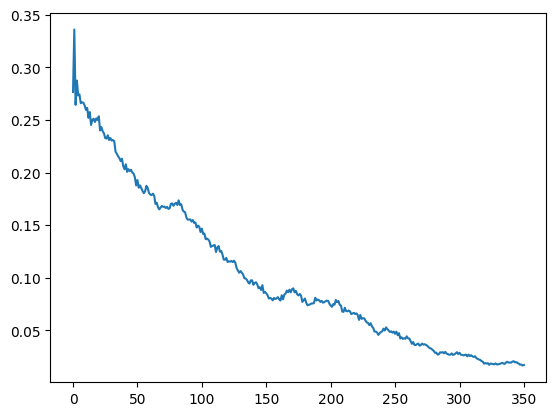

In [31]:
matrix = matrix_generator(x_dim, y_dim, 0.8)
save_matrix(matrix, "patterns/f80.txt")

board = board_init(x_dim, y_dim, "f80", game_type)
board_evo = board_evolut(evo_steps, board, game_type)
board_gif(x_dim, y_dim, time_per_image, evo_steps, board_evo, "f80")

avg_liveness_plot(board_evo, 'f80_graph')

As we can see in both cases the mean liveness reaches 0 after a typical time; this allows us to conclude that a stable dynamics can't be found for the semi-quantum version of the game. Nevertheless, a completly quantum version could show different conclusions.